In [1]:
from glob import glob
from xorca.lib import load_xorca_dataset
import xgcm
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
from cmocean import cm

import warnings
warnings.simplefilter('ignore')
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

#### Define paths to data

In [2]:
path_025_hind = '/scratch/usr/shkifmmp/ORCA025/hindcast/yearly/mops/'
path_025_ryf = '/scratch/usr/shkifmmp/ORCA025/RYF/yearly/mops/'
mask_path_025 = '/scratch/usr/shklvn09/NUDATA/ORCA/025-data/meshmask/'

path_05_hind1 = '/scratch/usr/shkifmmp/ORCA05/hind_1/yearly/mops/'
path_05_hind2 = '/scratch/usr/shkifmmp/ORCA05/hind_2/yearly/mops/'
mask_path_05 = '/scratch/usr/shklvn09/NUDATA/ORCA/05-data/meshmask/'

path_10_ryf = "/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly_EXP04/mops/" # EXP 04
path_10_hind = "/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly/mops/" # EXP 03 
mask_path_10 = '/scratch/usr/shklvn09/NUDATA/ORION/10-data/meshmask/'

In [3]:
meshmask_base_025 = [mask_path_025 + 'mesh_mask.nc']
meshmask_base_05 = [mask_path_05 + 'mesh_mask.nc']
meshmask_base_10 = [mask_path_10 + 'mesh_mask.nc']

In [4]:
output_025_hind = sorted(glob(path_025_hind + '*.nc'))
output_025_ryf = sorted(glob(path_025_ryf + '*.nc'))

output_05_hind1 = sorted(glob(path_05_hind1 + '*.nc'))
output_05_hind2 = sorted(glob(path_05_hind2 + '*.nc'))

output_10_hind = sorted(glob(path_10_hind + '*.nc'))
output_10_ryf = sorted(glob(path_10_ryf + '*.nc'))

In [5]:
output_10_hind[-1]

'/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly/mops/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5-EXP03_1y_20180101_20181231_grid_votemper.nc'

In [6]:
phi_mops_vars = {'O2': {'dims': ['t', 'y_c', 'x_c']}, #no z_c because the 1st layer was previously selected 
                    'PO4': {'dims': ['t', 'y_c', 'x_c']},
                    'NO3': {'dims': ['t', 'y_c', 'x_c']},
                    'DIC': {'dims': ['t', 'y_c', 'x_c']},
                    'co2flux': {'dims': ['t', 'y_c', 'x_c']},
                    'co2flux_pre': {'dims': ['t', 'y_c', 'x_c']},
                    'sozotaux': {'dims': ['t', 'y_c', 'x_c']},
                    'sosstsst': {'dims': ['t', 'y_c', 'x_c']},
                    'sosaline': {'dims': ['t', 'y_c', 'x_c']},
                    'somxl010': {'dims': ['t', 'y_c', 'x_c']}}

### Loading data

In [7]:
data_025_hind = load_xorca_dataset(data_files=output_025_hind, aux_files=meshmask_base_025, model_config='GLOBAL',
                               update_orca_variables = phi_mops_vars,
                               input_ds_chunks={"time_counter": 61, "t": 61, "z": 1, "deptht": 1, "depthu": 1, "depthv": 1, "depthw": 1},
                               target_ds_chunks = {"t": 61, "z_c": 1, "z_l": 1})

In [7]:
data_025_ryf = load_xorca_dataset(data_files=output_025_ryf, aux_files=meshmask_base_025, model_config='GLOBAL',
                               update_orca_variables = phi_mops_vars,
                               input_ds_chunks={"time_counter": 61, "t": 61, "z": 1, "deptht": 1, "depthu": 1, "depthv": 1, "depthw": 1},
                               target_ds_chunks = {"t": 61, "z_c": 1, "z_l": 1})

In [8]:
data_10_hind = load_xorca_dataset(data_files=output_10_hind, aux_files=meshmask_base_10, model_config='GLOBAL',
                               update_orca_variables = phi_mops_vars,
                               input_ds_chunks={"time_counter": 61, "t": 61, "z": 1, "deptht": 1, "depthu": 1, "depthv": 1, "depthw": 1},
                               target_ds_chunks = {"t": 61, "z_c": 1, "z_l": 1})

In [9]:
data_10_ryf = load_xorca_dataset(data_files=output_10_ryf, aux_files=meshmask_base_10, model_config='GLOBAL',
                               update_orca_variables = phi_mops_vars,
                               input_ds_chunks={"time_counter": 37, "t": 37, "z": 1, "deptht": 1, "depthu": 1, "depthv": 1, "depthw": 1},
                               target_ds_chunks = {"t": 37, "z_c": 1, "z_l": 1})

In [44]:
data_05_hind1 = load_xorca_dataset(data_files=output_05_hind1, aux_files=meshmask_base_05, model_config='GLOBAL',
                               update_orca_variables = phi_mops_vars,
                               input_ds_chunks={"time_counter": 61, "t": 61, "z": 1, "deptht": 1, "depthu": 1, "depthv": 1, "depthw": 1},
                               target_ds_chunks = {"t": 61, "z_c": 1, "z_l": 1})

In [11]:
data_05_hind2 = load_xorca_dataset(data_files=output_05_hind2, aux_files=meshmask_base_05, model_config='GLOBAL',
                               update_orca_variables = phi_mops_vars,
                               input_ds_chunks={"time_counter": 61, "t": 61, "z": 1, "deptht": 1, "depthu": 1, "depthv": 1, "depthw": 1},
                               target_ds_chunks = {"t": 61, "z_c": 1, "z_l": 1})

In [41]:
data_10_h

NameError: name 'data_10_hind' is not defined

### Definying metrics  for xgcm

In [46]:
# ORION 10

#at_10, au_10 = data_10_hind['e1t'] * data_10_hind['e2t'], data_10_hind['e1u'] * data_10_hind['e2u']
#av_10, af_10 = data_10_hind['e1v'] * data_10_hind['e2v'], data_10_hind['e1f'] * data_10_hind['e2f']

#data_10_hind = data_10_hind.update({'at': at_10, 'au': au_10, 'av': av_10, 'af': af_10})
#data_10_hind = data_10_hind.set_coords(['at', 'au', 'av', 'af'])

#data_10_ryf = data_10_ryf.update({'at': at_10, 'au': au_10, 'av': av_10, 'af': af_10})
#data_10_ryf = data_10_ryf.set_coords(['at', 'au', 'av', 'af'])

# ORCA 025

#at_025, au_025 = data_025_hind['e1t'] * data_025_hind['e2t'], data_025_hind['e1u'] * data_025_hind['e2u']
#av_025, af_025 = data_025_hind['e1v'] * data_025_hind['e2v'], data_025_hind['e1f'] * data_025_hind['e2f']

#data_025_hind = data_025_hind.update({'at': at_025, 'au': au_025, 'av': av_025, 'af': af_025})
#data_025_hind = data_025_hind.set_coords(['at', 'au', 'av', 'af'])

#data_025_ryf = data_025_ryf.update({'at': at_025, 'au': au_025, 'av': av_025, 'af': af_025})
#data_025_ryf = data_025_ryf.set_coords(['at', 'au', 'av', 'af'])

# ORCA 05

at_05, au_05 = data_05_hind1['e1t'] * data_05_hind1['e2t'], data_05_hind1['e1u'] * data_05_hind1['e2u']
av_05, af_05 = data_05_hind1['e1v'] * data_05_hind1['e2v'], data_05_hind1['e1f'] * data_05_hind1['e2f']

data_05_hind1 = data_05_hind1.update({'at': at_05, 'au': au_05, 'av': av_05, 'af': af_05})
data_05_hind1 = data_05_hind1.set_coords(['at', 'au', 'av', 'af'])

#data_05_hind2 = data_05_hind2.update({'at': at_05, 'au': au_05, 'av': av_05, 'af': af_05})
#data_05_hind2 = data_05_hind2.set_coords(['at', 'au', 'av', 'af'])

metrics = {('X',): ['e1t', 'e1u', 'e1v', 'e1f'], # X distances
           ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'], # Y distances
           ('Z',): ['e3t', 'e3u', 'e3v', 'e3w'], # Z distances
           ('X', 'Y'): ['at', 'au', 'av', 'af']} # Areas

In [47]:
data_05_hind1

<xarray.Dataset>
Dimensions:      (t: 122, x_c: 720, x_r: 720, y_c: 509, y_r: 509, z_c: 46, z_l: 46)
Coordinates:
  * t            (t) datetime64[ns] 1958-07-01T17:00:00 ... 2018-09-16
  * z_c          (z_c) int64 1 2 3 4 5 6 7 8 9 10 ... 38 39 40 41 42 43 44 45 46
  * z_l          (z_l) float64 0.5 1.5 2.5 3.5 4.5 ... 41.5 42.5 43.5 44.5 45.5
  * y_c          (y_c) int64 1 2 3 4 5 6 7 8 ... 502 503 504 505 506 507 508 509
  * y_r          (y_r) float64 1.5 2.5 3.5 4.5 5.5 ... 506.5 507.5 508.5 509.5
  * x_c          (x_c) int64 1 2 3 4 5 6 7 8 ... 713 714 715 716 717 718 719 720
  * x_r          (x_r) float64 1.5 2.5 3.5 4.5 5.5 ... 717.5 718.5 719.5 720.5
    depth_c      (z_c) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    depth_l      (z_l) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    llat_cc      (y_c, x_c) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llat_cr      (y_c, x_r) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llat_rc      (y_r, x_c) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llat_rr      (y_r, x_r) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llon_cc      (y_c, x_c) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llon_cr      (y_c, x_r) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llon_rc      (y_r, x_c) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llon_rr      (y_r, x_r) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e1t          (y_c, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e2t          (y_c, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e3t          (z_c, y_c, x_c) float64 dask.array<chunksize=(1, 509, 720), meta=np.ndarray>
    e1u          (y_c, x_r) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e2u          (y_c, x_r) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e3u          (z_c, y_c, x_r) float64 dask.array<chunksize=(1, 509, 720), meta=np.ndarray>
    e1v          (y_r, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e2v          (y_r, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e3v          (z_c, y_r, x_c) float64 dask.array<chunksize=(1, 509, 720), meta=np.ndarray>
    e1f          (y_r, x_r) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e2f          (y_r, x_r) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e3w          (z_l, y_c, x_c) float64 dask.array<chunksize=(1, 509, 720), meta=np.ndarray>
    tmask        (z_c, y_c, x_c) int8 dask.array<chunksize=(1, 509, 720), meta=np.ndarray>
    umask        (z_c, y_c, x_r) int8 dask.array<chunksize=(1, 509, 720), meta=np.ndarray>
    vmask        (z_c, y_r, x_c) int8 dask.array<chunksize=(1, 509, 720), meta=np.ndarray>
    fmask        (z_c, y_r, x_r) int8 dask.array<chunksize=(1, 509, 720), meta=np.ndarray>
    at           (y_c, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    au           (y_c, x_r) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    av           (y_r, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    af           (y_r, x_r) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
Data variables:
    co2flux      (t, y_c, x_c) float32 dask.array<chunksize=(61, 509, 720), meta=np.ndarray>
    co2flux_pre  (t, y_c, x_c) float32 dask.array<chunksize=(61, 509, 720), meta=np.ndarray>
    somxl010     (t, y_c, x_c) float32 dask.array<chunksize=(61, 509, 720), meta=np.ndarray>
    sosaline     (t, y_c, x_c) float32 dask.array<chunksize=(61, 509, 720), meta=np.ndarray>
    sosstsst     (t, y_c, x_c) float32 dask.array<chunksize=(61, 509, 720), meta=np.ndarray>
    sozotaux     (t, y_c, x_c) float32 dask.array<chunksize=(61, 509, 720), meta=np.ndarray>

In [48]:
#grid_10 = xgcm.Grid(data_10_hind, metrics=metrics)

grid_05 = xgcm.Grid(data_05_hind1, metrics=metrics)

#grid_025 = xgcm.Grid(data_025_hind, metrics=metrics)

In [49]:
sst = data_05_hind1['sosstsst']

In [13]:
sst

<xarray.DataArray 'sosstsst' (t: 122, y_c: 509, x_c: 720)>
dask.array<rechunk-merge, shape=(122, 509, 720), dtype=float32, chunksize=(61, 509, 720), chunktype=numpy.ndarray>
Coordinates:
  * t        (t) datetime64[ns] 1958-07-01T17:00:00 1958-09-16 ... 2018-09-16
  * y_c      (y_c) int64 1 2 3 4 5 6 7 8 9 ... 502 503 504 505 506 507 508 509
  * x_c      (x_c) int64 1 2 3 4 5 6 7 8 9 ... 713 714 715 716 717 718 719 720
    llat_cc  (y_c, x_c) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llon_cc  (y_c, x_c) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e1t      (y_c, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e2t      (y_c, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    at       (y_c, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>

In [73]:
grid_05.average(sst, ['Y','X']).values

array([13.16498116,         nan, 13.09703093,         nan, 13.07548402,
               nan, 13.05858942,         nan, 13.06107109,         nan,
       13.09356011,         nan, 13.00121146,         nan, 12.99528201,
               nan, 13.02027322,         nan, 12.99247885,         nan,
       12.9993721 ,         nan, 13.08585482,         nan, 13.0085206 ,
               nan, 12.96332021,         nan, 13.07981823,         nan,
       13.07411338,         nan, 12.97050377,         nan, 12.9544659 ,
               nan, 12.97746708,         nan, 13.10009384,         nan,
       13.06339318,         nan, 13.12865277,         nan, 13.13709389,
               nan, 13.09001132,         nan, 13.10606174,         nan,
       13.15243986,         nan, 13.07438978,         nan, 13.05197247,
               nan, 13.09328506,         nan, 13.18625719,         nan,
       13.12886505,         nan, 13.1022528 ,         nan, 13.18482181,
               nan, 13.20503212,         nan, 13.14981299,      

In [64]:
grid_05.average(sst, ['Y','X']).squeeze()

<xarray.DataArray (t: 122)>
dask.array<truediv, shape=(122,), dtype=float64, chunksize=(61,), chunktype=numpy.ndarray>
Coordinates:
  * t        (t) datetime64[ns] 1958-07-01T17:00:00 1958-09-16 ... 2018-09-16

In [33]:
grid_05.average?

Object `grid_05.weighted.mean` not found.


In [26]:
str(data_05_hind1['x_c'].isel(x_c=719).values)

'720'

In [27]:
lon = data_05_hind1['llon_cc'].isel(x_c=slice(200,300),y_c=slice(150,500))
lat = data_05_hind1['llat_cc'].isel(x_c=slice(200,300),y_c=slice(150,500))

In [30]:
temp = data_05_hind1['sosstsst'].isel(t=73,x_c=slice(200,300),y_c=slice(150,500))

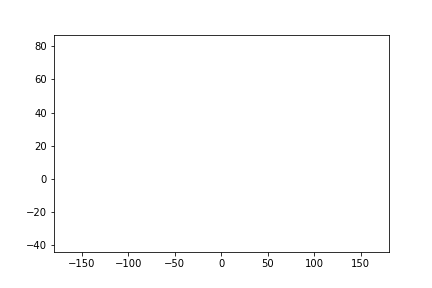

In [34]:
plt.pcolormesh(lon, lat, temp, cmap=cm.thermal)

### Mask with the area for averaging

In [70]:
sou = xr.open_dataset('/scratch/usr/shkifmmp/reccap2ocean_regions.nc').southern

In [71]:
sou

<xarray.DataArray 'southern' (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

In [29]:
a_1 = np.where(sou.values == 1)

In [31]:
a_1[1]

array([197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 299, 300, 301, 302, 303, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 299, 300, 301, 302, 303, 304, 31

In [78]:
sou_1

Trying to get lat/lon

In [4]:
orc_m05= xr.open_dataset('/scratch/usr/shklvn09/NUDATA/ORCA/05-data/meshmask/mesh_mask.nc')
orc_m025= xr.open_dataset('/scratch/usr/shklvn09/NUDATA/ORCA/025-data/meshmask/mesh_mask.nc')

In [96]:
orc_m05

<xarray.Dataset>
Dimensions:       (t: 1, x: 722, y: 511, z: 46)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 3.0467727 9.454049 ... 5624.9517 5875.141
    time_counter  (t) float64 0.0
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
    glamt         (t, y, x) float32 ...
    glamu         (t, y, x) float32 ...
    glamv         (t, y, x) float32 ...
    glamf         (t, y, x) float32 ...
    gphit         (t, y, x) float32 ...
    gphiu         (t, y, x) float32 ...
    gphiv         (t, y, x) float32 ...
    gphif         (t, y, x) float32 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    e1f           (t, y, x) float64 ...
    e2t           (t, y, x) float64 ...
    e2u           (t, y, x) float64 ...
    e2v           (t, y, x) float64 ...
    e2f           (t, y, x) float64 ...
    e3t           (t, z, y, x) float64 ...
    e3u           (t, z, y, x) float64 ...
    e3v           (t, z, y, x) float64 ...
    e3w           (t, z, y, x) float64 ...
    ff            (t, y, x) float64 ...
    mbathy        (t, y, x) int16 ...
    hdept         (t, y, x) float64 ...
    hdepw         (t, y, x) float64 ...
    e3t_ps        (t, y, x) float64 ...
    e3w_ps        (t, y, x) float64 ...
    gdept_0       (t, z) float64 3.047 9.454 16.36 ... 5.625e+03 5.875e+03
    gdepw_0       (t, z) float64 0.0 6.194 12.84 ... 5.25e+03 5.5e+03 5.75e+03
    e3t_0         (t, z) float64 6.191 6.64 7.2 7.895 ... 249.5 250.0 250.4
    e3w_0         (t, z) float64 6.0 6.403 6.905 7.528 ... 249.3 249.8 250.2
Attributes:
    time_stamp:  2010- 4-26, 11:39:14
    history:     crush 4.0.1 2006-09-19
    command:     
    index:       [1 1 1]

In [152]:
len(orc_m05.nav_lat.values[0,:])

722

In [120]:
orc_m05.nav_lat[66:118,438] # -67.103935 ~ -54.923775

<xarray.DataArray 'nav_lat' (y: 52)>
array([-67.103935, -66.90862 , -66.71173 , -66.51326 , -66.313194, -66.11152 ,
       -65.90823 , -65.703316, -65.496765, -65.28857 , -65.07871 , -64.867195,
       -64.65399 , -64.4391  , -64.22252 , -64.00423 , -63.78421 , -63.56247 ,
       -63.338985, -63.113754, -62.88676 , -62.658   , -62.42746 , -62.195126,
       -61.960995, -61.725048, -61.487286, -61.247692, -61.00626 , -60.762974,
       -60.517834, -60.27082 , -60.021927, -59.77115 , -59.51847 , -59.263885,
       -59.00738 , -58.748955, -58.48859 , -58.226284, -57.96202 , -57.695797,
       -57.427605, -57.15743 , -56.88527 , -56.61111 , -56.334946, -56.05677 ,
       -55.776573, -55.494347, -55.210083, -54.923775], dtype=float32)
Dimensions without coordinates: y

In [124]:
orc_m025.nav_lat.values[]

SyntaxError: invalid syntax (<ipython-input-124-84913ad27627>, line 1)

In [114]:
orc_m025.nav_lat[132:236,876]

<xarray.DataArray 'nav_lat' (y: 104)>
array([-67.103935, -67.00648 , -66.90862 , -66.81037 , -66.71173 , -66.61269 ,
       -66.51326 , -66.41343 , -66.313194, -66.212555, -66.11152 , -66.01008 ,
       -65.90823 , -65.80598 , -65.703316, -65.60025 , -65.496765, -65.392876,
       -65.28857 , -65.18385 , -65.07871 , -64.97316 , -64.867195, -64.7608  ,
       -64.65399 , -64.54676 , -64.4391  , -64.331024, -64.22252 , -64.11359 ,
       -64.00423 , -63.894436, -63.78421 , -63.673557, -63.56247 , -63.450947,
       -63.338985, -63.22659 , -63.113754, -63.00048 , -62.88676 , -62.772602,
       -62.658   , -62.542953, -62.42746 , -62.311516, -62.195126, -62.078285,
       -61.960995, -61.84325 , -61.725048, -61.606396, -61.487286, -61.367718,
       -61.247692, -61.127205, -61.00626 , -60.88485 , -60.762974, -60.640636,
       -60.517834, -60.39456 , -60.27082 , -60.14661 , -60.021927, -59.896774,
       -59.77115 , -59.645046, -59.51847 , -59.391415, -59.263885, -59.13587 ,
       -59.00738 , -58.87841 , -58.748955, -58.619015, -58.48859 , -58.35768 ,
       -58.226284, -58.094395, -57.96202 , -57.829155, -57.695797, -57.561947,
       -57.427605, -57.292767, -57.15743 , -57.0216  , -56.88527 , -56.74844 ,
       -56.61111 , -56.473278, -56.334946, -56.19611 , -56.05677 , -55.916924,
       -55.776573, -55.635715, -55.494347, -55.35247 , -55.210083, -55.067184,
       -54.923775, -54.77985 ], dtype=float32)
Dimensions without coordinates: y

In [113]:
438*2, 66*2, 118*2

(876, 132, 236)

In [77]:
orc_m05.nav_lon[66:118,438]

<xarray.DataArray 'nav_lon' (y: 52)>
array([-68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25,
       -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25,
       -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25,
       -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25,
       -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25,
       -68.25, -68.25, -68.25, -68.25, -68.25, -68.25, -68.25], dtype=float32)
Dimensions without coordinates: y

In [5]:
orc_m05.coords['x'] = orc_m05.nav_lon.values[0,:]
orc_m05.coords['y'] = orc_m05.nav_lat.values[:,0]

#del orc_m05['lat']
#orc_m05.coords['x'] = ('x', orc_m05.nav_lon)
#orc_m05.coords['y'] = ('y', orc_m05.nav_lat)

#orc_m05.nav_lon.sel(x=[32,33], method="nearest")

In [7]:
orc_m05

<xarray.Dataset>
Dimensions:       (t: 1, x: 722, y: 511, z: 46)
Coordinates:
  * x             (x) float32 72.75 73.25 73.75 74.25 ... 72.25 72.75 73.25
  * y             (y) float32 -77.010475 -76.89761 ... 49.995502 49.995502
Dimensions without coordinates: t, z
Data variables:
    nav_lon       (y, x) float32 72.75 73.25 73.75 ... 73.000015 72.999985
    nav_lat       (y, x) float32 -77.010475 -77.010475 ... 49.995502 49.995502
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
    glamt         (t, y, x) float32 ...
    glamu         (t, y, x) float32 ...
    glamv         (t, y, x) float32 ...
    glamf         (t, y, x) float32 ...
    gphit         (t, y, x) float32 ...
    gphiu         (t, y, x) float32 ...
    gphiv         (t, y, x) float32 ...
    gphif         (t, y, x) float32 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    e1f           (t, y, x) float64 ...
    e2t           (t, y, x) float64 ...
    e2u           (t, y, x) float64 ...
    e2v           (t, y, x) float64 ...
    e2f           (t, y, x) float64 ...
    e3t           (t, z, y, x) float64 ...
    e3u           (t, z, y, x) float64 ...
    e3v           (t, z, y, x) float64 ...
    e3w           (t, z, y, x) float64 ...
    ff            (t, y, x) float64 ...
    mbathy        (t, y, x) int16 ...
    hdept         (t, y, x) float64 ...
    hdepw         (t, y, x) float64 ...
    e3t_ps        (t, y, x) float64 ...
    e3w_ps        (t, y, x) float64 ...
    gdept_0       (t, z) float64 ...
    gdepw_0       (t, z) float64 ...
    e3t_0         (t, z) float64 ...
    e3w_0         (t, z) float64 ...
Attributes:
    time_stamp:  2010- 4-26, 11:39:14
    history:     crush 4.0.1 2006-09-19
    command:     
    index:       [1 1 1]

In [8]:
print(orc_m05)

<xarray.Dataset>
Dimensions:       (t: 1, x: 722, y: 511, z: 46)
Coordinates:
  * x             (x) float32 72.75 73.25 73.75 74.25 ... 72.25 72.75 73.25
  * y             (y) float32 -77.010475 -76.89761 ... 49.995502 49.995502
Dimensions without coordinates: t, z
Data variables:
    nav_lon       (y, x) float32 72.75 73.25 73.75 ... 73.000015 72.999985
    nav_lat       (y, x) float32 -77.010475 -77.010475 ... 49.995502 49.995502
    nav_lev       (z) float32 3.0467727 9.454049 ... 5624.9517 5875.141
    time_counter  (t) float64 0.0
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
    glamt         (t, y, x) float32 ...
    glamu         (t, y, x) float32 ...
    glamv         (t, y, x) float32 ...
    glamf         (t, y, x) fl

In [9]:
a = orc_m05.sel(x=72.75).values

In [12]:
index(a)

NameError: name 'index' is not defined

In [59]:
orc_m025.keys()

KeysView(<xarray.Dataset>
Dimensions:       (t: 1, x: 1442, y: 1021, z: 46)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
    glamt         (t, y, x) float32 ...
    glamu         (t, y, x) float32 ...
    glamv         (t, y, x) float32 ...
    glamf         (t, y, x) float32 ...
    gphit         (t, y, x) float32 ...
    gphiu         (t, y, x) float32 ...
    gphiv         (t, y, x) float32 ...
    gphif         (t, y, x) float32 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v        

In [141]:
orc_m05 = orc_m05.assign_coords({"x": (orc_m05.nav_lon[1,:])})
orc_m05 = orc_m05.assign_coords({"y": (orc_m05.nav_lon[:,1])})

ValueError: dimension 'x' already exists as a scalar variable

In [140]:
print(orc_m05)

<xarray.Dataset>
Dimensions:       (t: 1, x: 722, y: 511, z: 46)
Coordinates:
    lon           float32 73.25
    lat           (y) float32 73.25 73.25 73.25 ... 73.00464 73.000015 72.999985
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 3.0467727 9.454049 ... 5624.9517 5875.141
    time_counter  (t) float64 0.0
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
    glamt         (t, y, x) float32 ...
    glamu         (t, y, x) float32 ...
    glamv         (t, y, x) float32 ...
    glamf         (t, y, x) float32 ...
    gphit         (t, y, x) float32 ...
    gphiu         (t, y, x) float32 ...
    gphiv         (t, 

In [ ]:
orc_m05 = orc_m05.assign_coord

In [25]:
orc_m05

<xarray.Dataset>
Dimensions:       (t: 1, x: 722, y: 511, z: 46)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 3.0467727 9.454049 ... 5624.9517 5875.141
    time_counter  (t) float64 0.0
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
    glamt         (t, y, x) float32 ...
    glamu         (t, y, x) float32 ...
    glamv         (t, y, x) float32 ...
    glamf         (t, y, x) float32 ...
    gphit         (t, y, x) float32 ...
    gphiu         (t, y, x) float32 ...
    gphiv         (t, y, x) float32 ...
    gphif         (t, y, x) float32 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    e1f           (t, y, x) float64 ...
    e2t           (t, y, x) float64 ...
    e2u           (t, y, x) float64 ...
    e2v           (t, y, x) float64 ...
    e2f           (t, y, x) float64 ...
    e3t           (t, z, y, x) float64 ...
    e3u           (t, z, y, x) float64 ...
    e3v           (t, z, y, x) float64 ...
    e3w           (t, z, y, x) float64 ...
    ff            (t, y, x) float64 ...
    mbathy        (t, y, x) int16 ...
    hdept         (t, y, x) float64 ...
    hdepw         (t, y, x) float64 ...
    e3t_ps        (t, y, x) float64 ...
    e3w_ps        (t, y, x) float64 ...
    gdept_0       (t, z) float64 3.047 9.454 16.36 ... 5.625e+03 5.875e+03
    gdepw_0       (t, z) float64 0.0 6.194 12.84 ... 5.25e+03 5.5e+03 5.75e+03
    e3t_0         (t, z) float64 6.191 6.64 7.2 7.895 ... 249.5 250.0 250.4
    e3w_0         (t, z) float64 6.0 6.403 6.905 7.528 ... 249.3 249.8 250.2
Attributes:
    time_stamp:  2010- 4-26, 11:39:14
    history:     crush 4.0.1 2006-09-19
    command:     
    index:       [1 1 1]